You can get the dataset from here https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

In [292]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [293]:
#import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv")
df.head()# it will show the 1st 5 rows 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


we have total 6 variables and the target variable is diagnosis 1 = malignant which is Harmful, 0 = benign which is not harmful

In [268]:
df.shape # no of rows & columns

(569, 6)

In [269]:
df.info() #will give the data type and no of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [270]:
df.describe() #basic statistics about the data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [271]:
#checking for any null values in the dataset
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [272]:
count = df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

So, we have 357 malignants(1) and 212 benigns(0) in the target variable

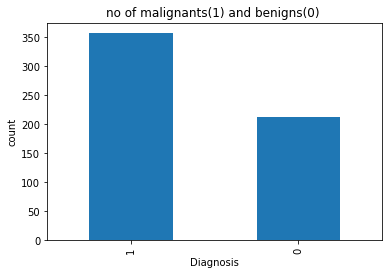

In [273]:
count.plot(kind='bar')
plt.title("no of malignants(1) and benigns(0) ")
plt.xlabel("Diagnosis")
plt.ylabel("count");

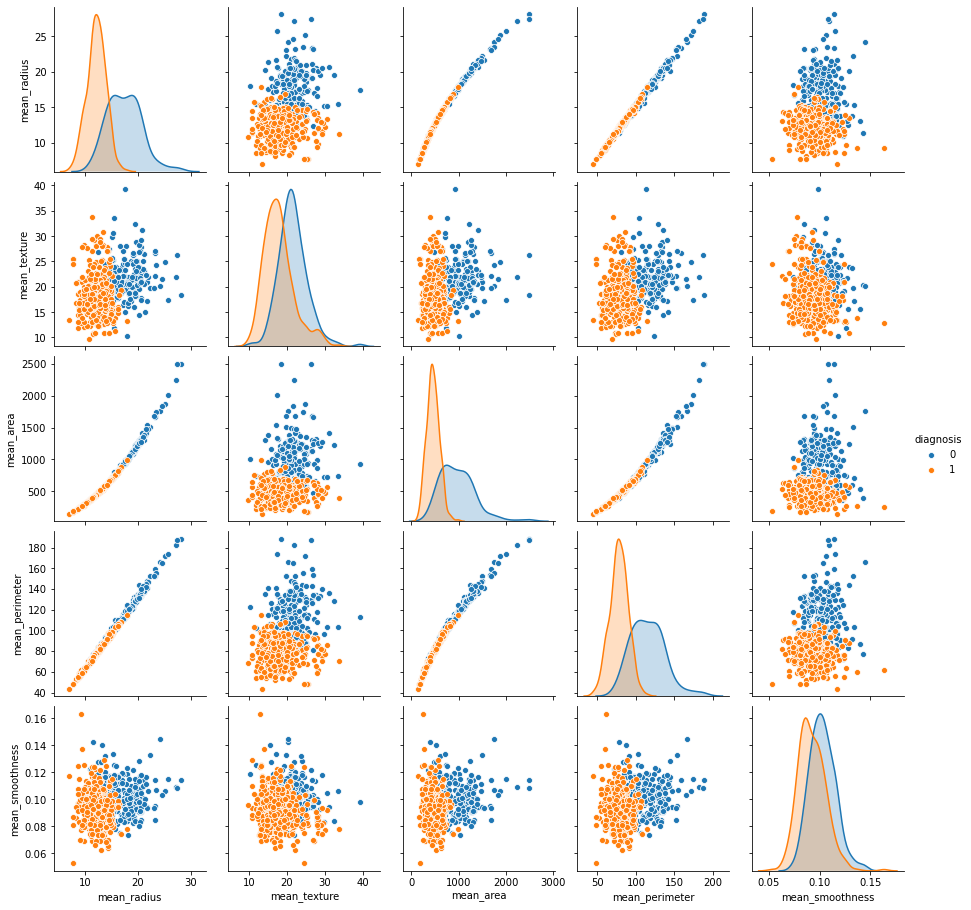

In [274]:
sns.pairplot(df, hue = 'diagnosis', vars = ['mean_radius', 'mean_texture', 'mean_area', 'mean_perimeter', 'mean_smoothness'] );

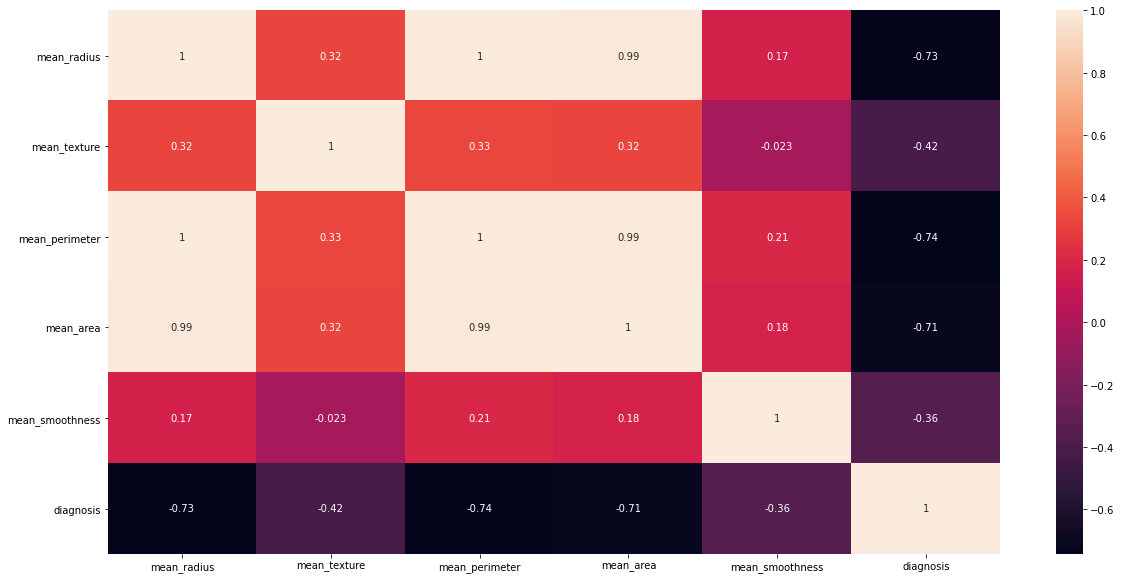

In [275]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) ;

we can see on the correlation heatmap there is a strong negative correlation between diagnosis and mean_perimeter followed by mean_radius and mean_area

In [276]:
# Let's drop the target label coloumns
X = df.drop(['diagnosis'],axis=1)
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [277]:
y = df['diagnosis']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

# Splitting the dataset into train & test

In [294]:
#now we will prepare the dataset for Machine learning by splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [279]:
X_train.shape

(455, 5)

In [280]:
X_test.shape

(114, 5)

In [281]:
y_train.shape

(455,)

In [282]:
y_test.shape

(114,)

Now, we have all the data separated into train & test split with Test set 20% and Train set 80%

# Training the Model

In [295]:
#we use logistic regression model to classify whether a tumor is malignant or benign based on the characteristics or features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [296]:
classifier = LogisticRegression()

Fitting the Logistic Regression Model

In [297]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the Test set results

In [298]:
y_pred = classifier.predict(X_test)

In [299]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1])

Calculating the accuracy of the model

In [300]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 90.35087719298247


In [301]:
#confusion matrix to check no of right predictions we got
cm = confusion_matrix(y_test, y_pred)

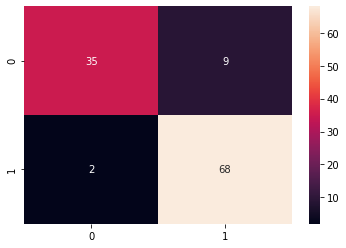

In [302]:
sns.heatmap(cm, annot=True);

In [303]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.88      0.97      0.93        70

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



We got an accuracy of 91%
Thank you 